#### 📦 Importações e Estilo dos Gráficos
Nesta célula, realizamos as importações principais: pandas para análise de dados, matplotlib.pyplot para visualizações e sqlalchemy para integração com banco de dados SQL. Também configuramos o estilo seaborn-darkgrid para tornar os gráficos mais visuais e agradáveis.

In [3]:
# 📦 Importações
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

plt.style.use('seaborn-v0_8-darkgrid')
# estilo seguro e bonito

%matplotlib inline


#### 📥 Carregando os Dados do Google Play Store
Nesta etapa, carregamos o dataset googleplaystore.csv usando pandas.read_csv() e exibimos as primeiras linhas para ter uma ideia inicial da estrutura e conteúdo.

In [4]:
# 📥 Leitura do CSV
df = pd.read_csv("googleplaystore.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### 🔍 Remoção de Duplicatas
Removemos entradas duplicadas para garantir que cada aplicativo seja representado apenas uma vez no dataset.



In [5]:
# 🔍 Remoção de duplicatas
df = df.drop_duplicates()
print(f"Número de linhas após remoção de duplicadas: {len(df)}")


Número de linhas após remoção de duplicadas: 10358


#### 🧼 Limpeza e Preparação dos Dados
Realizamos uma série de limpezas:

Padronização e conversão de colunas como Installs, Price e Reviews para formato numérico.

Remoção de caracteres como +, , e $.

Eliminação de linhas com dados inválidos.

Priorização do app com mais instalações em casos de duplicidade de nome.

In [6]:
# 🧼 Limpeza dos dados

# Remover duplicatas
df = df.drop_duplicates()

# Limpar 'Installs' — remover vírgulas e '+', converter para número
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '').replace('+', '').strip())
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Limpar 'Price' — remover cifrão, converter para número
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '').strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Converter 'Reviews' para numérico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Remover entradas com installs ou reviews inválidos
df = df.dropna(subset=['Installs', 'Reviews'])

# Se houver apps duplicados, manter o com mais instalações
df = df.sort_values('Installs', ascending=False).drop_duplicates(subset='App', keep='first')

# Verificar formato final
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 341 to 6692
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


#### 📊 Top 5 Aplicativos com Mais Instalações
Aqui identificamos os cinco aplicativos mais populares com base no número de instalações, utilizando um gráfico de barras para facilitar a visualização.

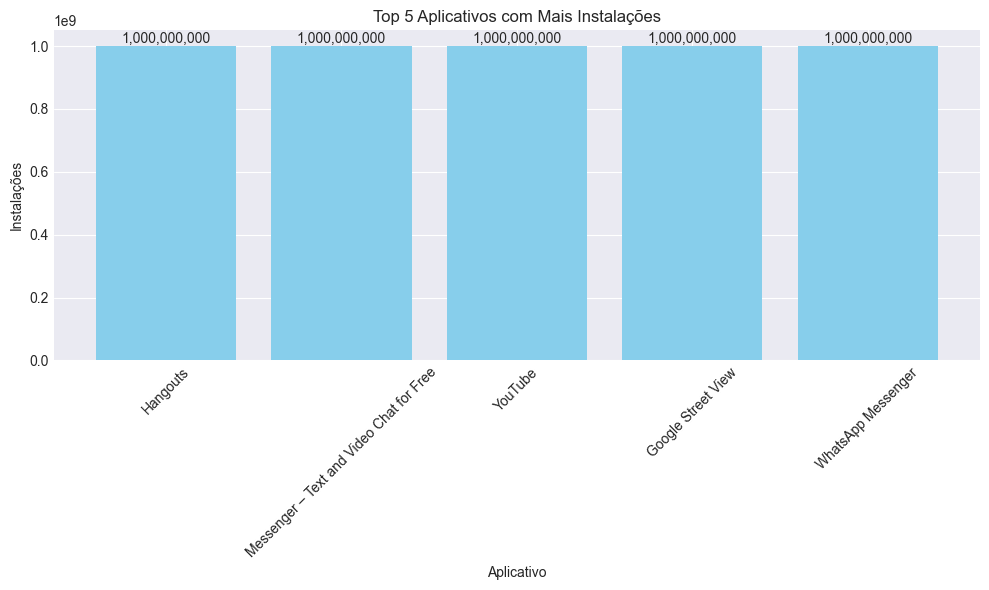

In [7]:
# 📊 Top 5 aplicativos com mais instalações

top5 = df.sort_values('Installs', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top5['App'], top5['Installs'], color='skyblue')
plt.title('Top 5 Aplicativos com Mais Instalações')
plt.xlabel('Aplicativo')
plt.ylabel('Instalações')
plt.xticks(rotation=45)

# Adicionar números em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 🥧 Distribuição das 10 Principais Categorias
Criamos um gráfico de pizza que mostra as 10 categorias de aplicativos mais frequentes no dataset, destacando sua proporção em relação ao total.

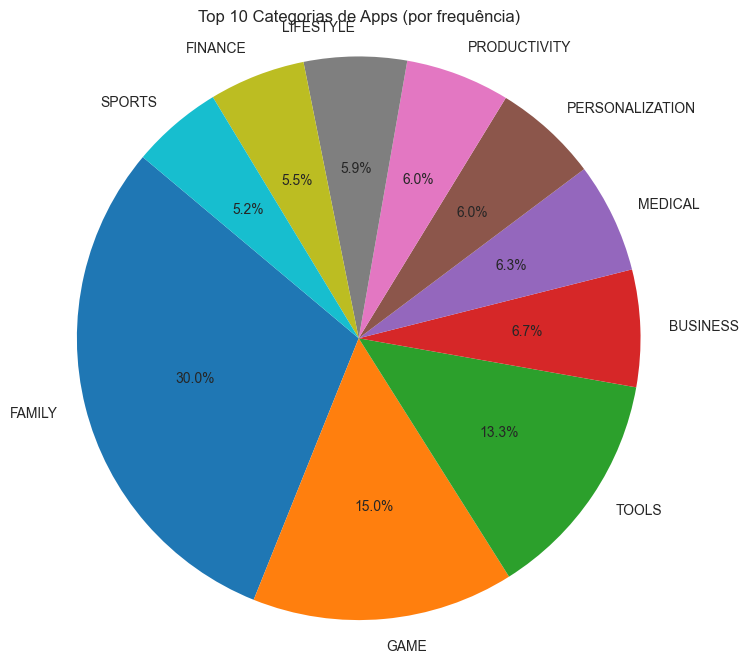

In [8]:
# 🥧 Gráfico de Pizza: frequência de categorias de apps

categoria_freq = df['Category'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(categoria_freq, labels=categoria_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categorias de Apps (por frequência)')
plt.axis('equal')  # para manter a forma circular
plt.show()



#### 💰 Aplicativo Mais Caro
Filtramos os aplicativos pagos e identificamos o mais caro do dataset, destacando seu nome, preço e categoria.

In [ ]:
# Garantir que 'Price' esteja limpo e numérico (sem cifrão ou texto)
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Filtrar apenas apps pagos
apps_pagos = df[df['Type'] == 'Paid']

# Verificar o valor máximo de Price
preco_max = apps_pagos['Price'].max()

# Buscar app(s) com esse preço
apps_mais_caros = apps_pagos[apps_pagos['Price'] == preco_max][['App', 'Price', 'Category']]

# Exibir resultados
print(f"Preço máximo entre apps pagos: ${preco_max:.2f}")
print("App(s) mais caro(s):")
print(apps_mais_caros)

##### duas versoes do mesmo código, corrigir depois
# 💰 App mais caro do dataset

app_mais_caro = df.sort_values('Price', ascending=False).head(1)
print("App mais caro:")
print(app_mais_caro[['App', 'Price', 'Category']])

mais_caro = df[df['Price'] == df['Price'].max()]
mais_caro[['App', 'Price']]


Preço máximo entre apps pagos: $400.00
App(s) mais caro(s):
                           App  Price   Category
4367  I'm Rich - Trump Edition  400.0  LIFESTYLE
App mais caro:
                           App  Price   Category
4367  I'm Rich - Trump Edition  400.0  LIFESTYLE


,App,Price
4367,I'm Rich - Trump Edition,400.0


#### 🔞 Quantidade de Apps "Mature 17+"
Contamos quantos aplicativos estão classificados como apropriados para maiores de 17 anos (Content Rating = 'Mature 17+').

In [ ]:
# 🔞 Quantos apps são classificados como "Mature 17+"

mature_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Quantidade de apps 'Mature 17+': {mature_count}")


Número de apps 'Mature 17+': 375
Quantidade de apps 'Mature 17+': 375


#### 🏆 Top 10 Aplicativos com Mais Reviews
Identificamos os 10 aplicativos que receberam o maior número de avaliações (reviews) dos usuários.

In [29]:
# 🏆 Top 10 apps com maior número de reviews

print("Top 10 apps com mais reviews:")



top_reviews = df.sort_values('Reviews', ascending=False).head(10)
top_reviews[['App', 'Reviews']]


Top 10 apps com mais reviews:


,App,Reviews
3943,Facebook,78128208.0
3904,WhatsApp Messenger,69109672.0
3909,Instagram,66509917.0
335,Messenger – Text and Video Chat for Free,56642847.0
3986,Clash of Clans,44881447.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1654,Subway Surfers,27722264.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
3987,Clash Royale,23125280.0


#### 🌟 Apps Gratuitos com Rating Alto
Selecionamos os aplicativos gratuitos com nota superior a 4.7, ordenados por número de instalações. Esses apps combinam popularidade e alta avaliação.



In [34]:
# Lista de apps gratuitos com rating alto
apps_rating_alto = df[(df['Type'] == 'Free') & (df['Rating'] > 4.7)].sort_values('Installs', ascending=False)
print("Apps gratuitos com rating > 4.7:")
apps_rating_alto[['App', 'Rating', 'Installs']]


Apps gratuitos com rating > 4.7:


,App,Rating,Installs
1360,Period Tracker - Period Calendar Ovulation Tra...,4.8,100000000.0
4038,"DU Recorder – Screen Recorder, Video Editor, Live",4.8,50000000.0
5704,Video Player All Format,4.8,10000000.0
1820,"Cash, Inc. Money Clicker Game & Business Adven...",4.8,10000000.0
1261,Lose Weight in 30 Days,4.8,10000000.0
...,...,...,...
6700,Brick Breaker BR,5.0,5.0
7731,CQ ESPM,5.0,5.0
2484,Clinic Doctor EHr,5.0,5.0
2450,Tablet Reminder,5.0,5.0


#### Média de reviews para apps da categoria 'GAME'

In [40]:
# Filtrar apps da categoria GAME
apps_game = df[df['Category'] == 'GAME']

# Calcular a média de reviews
media_reviews_game = apps_game['Reviews'].mean()

print(f"Média de reviews para apps da categoria 'GAME': {media_reviews_game:.0f}")


Média de reviews para apps da categoria 'GAME': 509109


#### 📈 Gráfico: Top 10 Apps Gratuitos com Nota Alta
Visualizamos os 10 principais apps gratuitos com nota acima de 4.7 em um gráfico de barras horizontais, facilitando a comparação de ratings.

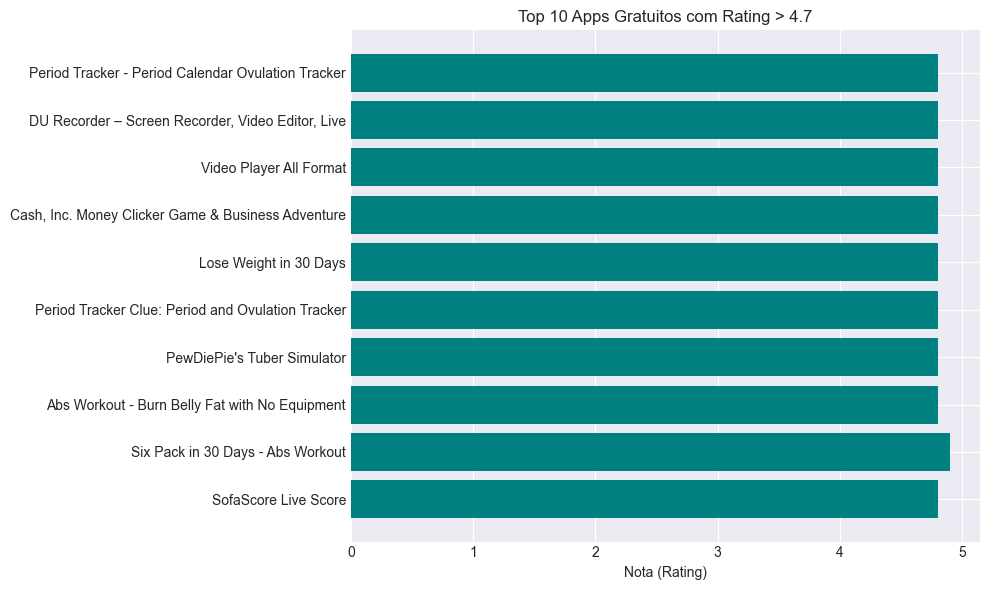

In [36]:
top_free_high_rating = apps_rating_alto.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_free_high_rating['App'], top_free_high_rating['Rating'], color='teal')
plt.xlabel('Nota (Rating)')
plt.title('Top 10 Apps Gratuitos com Rating > 4.7')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### 🎮 Top 10 Apps da Categoria "GAME" com Mais Reviews
Filtramos os aplicativos da categoria GAME e mostramos os 10 mais avaliados pelos usuários, utilizando um gráfico de barras.

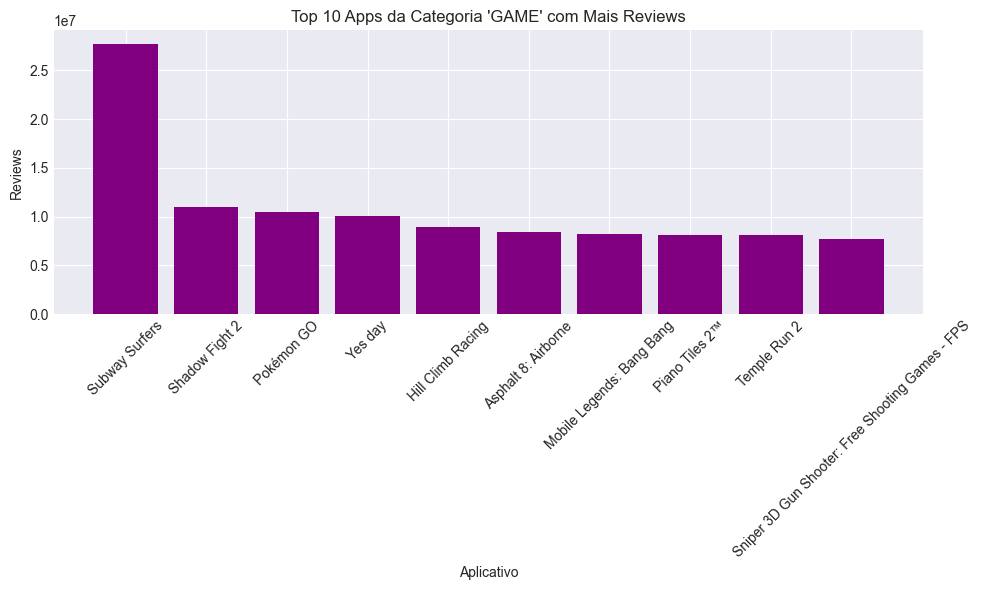

In [41]:
# Top 10 apps da categoria GAME com mais reviews
top_games_reviews = apps_game.sort_values('Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_games_reviews['App'], top_games_reviews['Reviews'], color='purple')
plt.title("Top 10 Apps da Categoria 'GAME' com Mais Reviews")
plt.xlabel("Aplicativo")
plt.ylabel("Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 💾 Criação do Banco de Dados SQLite
Nesta etapa, criamos um banco de dados SQLite chamado apps_db.sqlite e salvamos o DataFrame como tabela apps usando SQLAlchemy.

In [10]:
import sqlite3
from sqlalchemy import create_engine

# Criar conexão SQLite com SQLAlchemy
engine = create_engine('sqlite:///apps_db.sqlite', echo=False)

# Salvar DataFrame no banco de dados com o nome 'apps'
df.to_sql('apps', con=engine, if_exists='replace', index=False)

print("Tabela 'apps' criada com sucesso.")


Tabela 'apps' criada com sucesso.


🔎 Queries solicitadas - Consultas SQL no Banco de Dados
Executamos diversas queries SQL diretamente no banco

In [11]:
import pandas as pd

# a) Nome e categoria dos 10 apps mais instalados
query_a = """
SELECT App, Category, Installs
FROM apps
ORDER BY Installs DESC
LIMIT 10;
"""
df_a = pd.read_sql(query_a, con=engine)
print("a) Top 10 apps mais instalados:")
print(df_a)

# b) Apps classificados como 'Mature 17+'
query_b = """
SELECT App
FROM apps
WHERE [Content Rating] = 'Mature 17+';
"""
df_b = pd.read_sql(query_b, con=engine)
print("\nb) Apps com classificação 'Mature 17+':")
print(df_b)

# c) Média de reviews por categoria
query_c = """
SELECT Category, AVG(Reviews) as Media_Reviews
FROM apps
GROUP BY Category
ORDER BY Media_Reviews DESC;
"""
df_c = pd.read_sql(query_c, con=engine)
print("\nc) Média de reviews por categoria:")
print(df_c)

# d) Apps pagos com preço maior que 20
query_d = """
SELECT App, Price
FROM apps
WHERE Type = 'Paid' AND Price > 20
ORDER BY Price DESC;
"""
df_d = pd.read_sql(query_d, con=engine)
print("\nd) Apps pagos com preço > $20:")
print(df_d)


a) Top 10 apps mais instalados:
                             App            Category      Installs
0                       Hangouts       COMMUNICATION  1.000000e+09
1                        YouTube       VIDEO_PLAYERS  1.000000e+09
2                          Gmail       COMMUNICATION  1.000000e+09
3   Google Chrome: Fast & Secure       COMMUNICATION  1.000000e+09
4                 Subway Surfers                GAME  1.000000e+09
5                   Google Drive        PRODUCTIVITY  1.000000e+09
6                  Google Photos         PHOTOGRAPHY  1.000000e+09
7              Google Play Games       ENTERTAINMENT  1.000000e+09
8                    Google News  NEWS_AND_MAGAZINES  1.000000e+09
9  Skype - free IM & video calls       COMMUNICATION  1.000000e+09

b) Apps com classificação 'Mature 17+':
                                        App
0                                   Twitter
1                                  Telegram
2                                        VK
3            B

3. Gráficos para visualização dos resultados

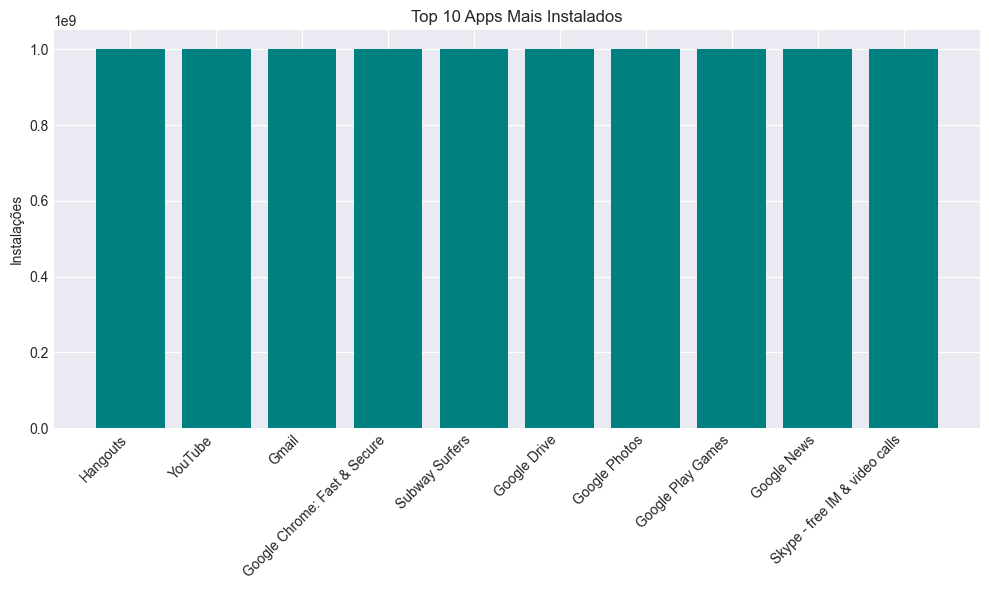

In [12]:
import matplotlib.pyplot as plt
# top 10 apps mais instalados

plt.figure(figsize=(10, 6))
plt.bar(df_a['App'], df_a['Installs'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Apps Mais Instalados")
plt.ylabel("Instalações")
plt.tight_layout()
plt.show()


Média de reviews por categoria (Top 10)

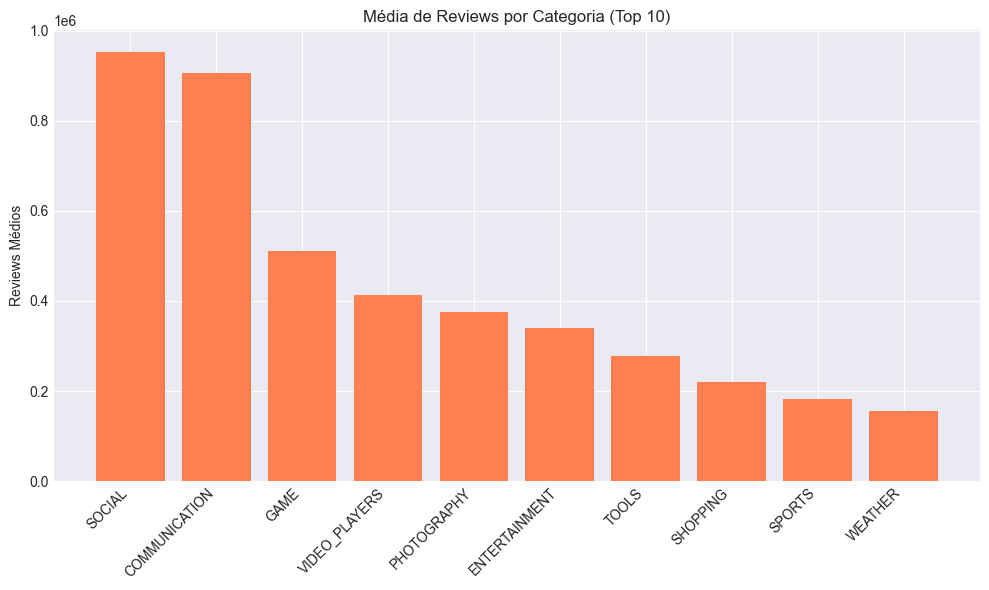

In [13]:
top_reviews_cat = df_c.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_reviews_cat['Category'], top_reviews_cat['Media_Reviews'], color='coral')
plt.xticks(rotation=45, ha='right')
plt.title("Média de Reviews por Categoria (Top 10)")
plt.ylabel("Reviews Médios")
plt.tight_layout()
plt.show()
